In [1]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load directly optimized parameters
df_overlap = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json', orient='index')

In [4]:
df_MF = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_MF.json', orient='index')

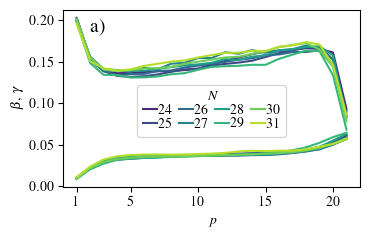

In [5]:
p = 21

global_scale = 24

f, ax = plt.subplots(figsize=(3.8, 2.47213))

dftmp = df_overlap[(df_overlap['p'] == p) & (df_overlap['N'] >= 24)]
Ns = sorted(set(dftmp['N']))
cmap = sns.color_palette('viridis', len(Ns))

for idx, N in enumerate(Ns):
    row = dftmp[dftmp['N'] == N].squeeze()
    plt.plot(range(1,p+1), -np.array(row['beta']), c=cmap[idx])
    plt.plot(range(1,p+1), np.array(row['gamma']) * N / global_scale, c=cmap[idx], label=str(N))
    
# plt.xticks([1,5,10,15,20,25])
plt.xticks([1,5,10,15,20])
plt.text(2, 0.185, 'a)', fontsize=14)
plt.ylabel(r'$\beta$, $\gamma$')
plt.xlabel(r'$p$')
legend = plt.legend(title=r"$N$", ncols=4, labelspacing=0.1, handletextpad=0.1, handlelength=1, columnspacing=0.5, loc='center', bbox_to_anchor=(0.5,0.43))
plt.tight_layout()
plt.savefig('figures/parameters_all_overlap.pdf')

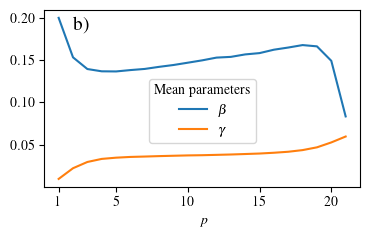

In [6]:
f, ax = plt.subplots(figsize=(3.8, 2.47213))

plt.plot(
    range(1,p+1), 
    np.mean([-np.array(dftmp[dftmp['N'] == N].squeeze()['beta']) for N in Ns], axis=0), 
    label=r'$\beta$'
)
plt.plot(
    range(1,p+1), 
    np.mean([np.array(dftmp[dftmp['N'] == N].squeeze()['gamma']) * N / global_scale for N in Ns], axis=0), 
    label=r'$\gamma$'
)
plt.text(2, 0.185, 'b)', fontsize=14)
# plt.xticks([1,5,10,15,20,25])
plt.xticks([1,5,10,15,20])
plt.legend(title='Mean parameters', loc='center', bbox_to_anchor=(0.5,0.43))
plt.xlabel(r'$p$')
plt.tight_layout()
plt.savefig('figures/parameters_mean_overlap.pdf')

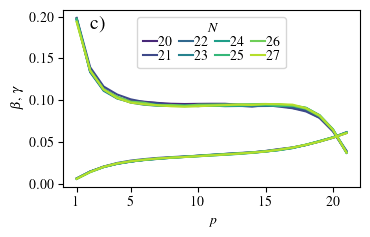

In [7]:
p = 21

f, ax = plt.subplots(figsize=(3.8, 2.47213))

dftmp = df_MF[(df_MF['p'] == p) & (df_MF['N'] >= 20)]
Ns = sorted(set(dftmp['N']))
cmap = sns.color_palette('viridis', len(Ns))

for idx, N in enumerate(Ns):
    row = dftmp[dftmp['N'] == N].squeeze()
    plt.plot(range(1,p+1), -np.array(row['beta']), c=cmap[idx])
    plt.plot(range(1,p+1), np.array(row['gamma']) * N / global_scale, c=cmap[idx], label=str(N))
    
plt.xticks([1,5,10,15,20])
plt.text(2, 0.185, 'c)', fontsize=14)
plt.ylabel(r'$\beta$, $\gamma$')
plt.xlabel(r'$p$')
legend = plt.legend(title=r"$N$", ncols=4, labelspacing=0.1, handletextpad=0.1, handlelength=1, columnspacing=0.5, loc='upper center')
plt.tight_layout()
plt.savefig('figures/parameters_all_MF.pdf')

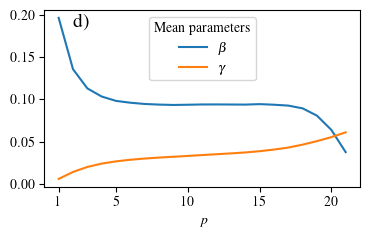

In [8]:
f, ax = plt.subplots(figsize=(3.8, 2.47213))

plt.plot(
    range(1,p+1), 
    np.mean([-np.array(dftmp[dftmp['N'] == N].squeeze()['beta']) for N in Ns], axis=0), 
    label=r'$\beta$'
)
plt.plot(
    range(1,p+1), 
    np.mean([np.array(dftmp[dftmp['N'] == N].squeeze()['gamma']) * N / global_scale for N in Ns], axis=0), 
    label=r'$\gamma$'
)
plt.text(2, 0.185, 'd)', fontsize=14)
plt.xticks([1,5,10,15,20])
plt.legend(title='Mean parameters', loc='upper center')
plt.xlabel(r'$p$')
plt.tight_layout()
plt.savefig('figures/parameters_mean_MF.pdf')

## Compare performance with fixed and directly optimized parameters

In [111]:
df_tran_overlap = pd.read_json("../qokit/assets/transferred_mean_overlap_0228.json", orient='index')
df_tran_MF = pd.read_json("../qokit/assets/trasferred_mean_MF_0320.json", orient='index')

In [118]:
df_merged_overlap = df_overlap.set_index(["N", "p"]).merge(
    df_tran_overlap.set_index(["N", "p"]).drop(columns=['overlap', 'gamma', 'beta', 'merit factor']), 
    left_index=True, right_index=True, how="outer"
)[['overlap', 'gamma', 'beta', 'merit factor',
       'overlap transferred', 'merit factor transferred']].reset_index()

df_merged_overlap['overlap transferred / overlap optimized'] = df_merged_overlap['overlap transferred'] / df_merged_overlap['overlap']
df_merged_overlap = df_merged_overlap.dropna(subset=['overlap transferred / overlap optimized'])

In [112]:
df_merged_MF = df_MF.set_index(["N", "p"]).merge(
    df_tran_MF.set_index(["N", "p"]).drop(columns=['overlap', 'gamma', 'beta', 'merit factor']), 
    left_index=True, right_index=True, how="outer"
)[['overlap', 'gamma', 'beta', 'merit factor',
       'overlap transferred', 'merit factor transferred']].reset_index()

df_merged_MF['MF transferred / MF optimized'] = df_merged_MF['merit factor transferred'] / df_merged_MF['merit factor']
df_merged_MF = df_merged_MF.dropna(subset=['MF transferred / MF optimized'])

/tmp/ipykernel_93291/792039808.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_tmp.median()['overlap transferred / overlap optimized'].plot(c=cmap[0], ax=ax[0,0])
/tmp/ipykernel_93291/792039808.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax[0,0].fill_between(gb_tmp.groups.keys(), gb_tmp.quantile(0.25)['overlap transferred / overlap optimized'], gb_tmp.quantile(0.75)['overlap transferred / overlap optimized'], color=cmap[0], alpha=0.2)
/tmp/ipykernel_93291/792039808.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, nu

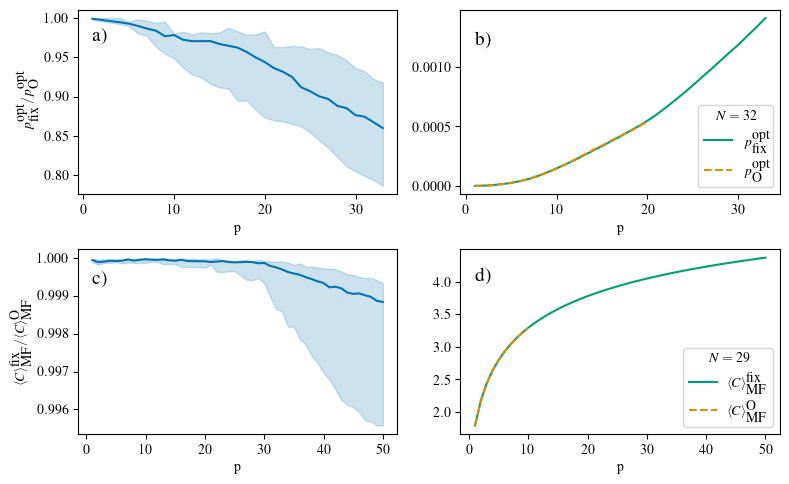

In [134]:
cmap = sns.color_palette('colorblind')

f, ax = plt.subplots(2,2,figsize=(8, 4.94426))

##################################################
# Top row: overlap
##################################################

gb_tmp = df_merged_overlap[(df_merged_overlap["N"] >= 25) & (df_merged_overlap["p"] != 2) & (df_merged_overlap["p"] != 3)].groupby("p")
# gb_tmp = df_merged_overlap[df_merged_overlap["N"] >= 25].groupby("p")
gb_tmp.median()['overlap transferred / overlap optimized'].plot(c=cmap[0], ax=ax[0,0])
ax[0,0].fill_between(gb_tmp.groups.keys(), gb_tmp.quantile(0.25)['overlap transferred / overlap optimized'], gb_tmp.quantile(0.75)['overlap transferred / overlap optimized'], color=cmap[0], alpha=0.2)
ax[0,0].set_ylabel(r'$p^{\mbox{opt}}_{\mbox{fix}} / p^{\mbox{opt}}_{\mbox{O}}$')
ax[0,0].text(1, 0.97, 'a)', fontsize=14)

df_tran_overlap[df_tran_overlap["N"] == 32].set_index('p')['overlap transferred'].plot(ax=ax[0,1], c=cmap[2], label=r'$p^{\mbox{opt}}_{\mbox{fix}}$')
df_overlap[df_overlap["N"] == 32].set_index('p')['overlap'].plot(ax=ax[0,1], c=cmap[1], label=r'$p^{\mbox{opt}}_{\mbox{O}}$', linestyle='dashed')
ax[0,1].legend(title="$N = 32$", loc='lower right')
ax[0,1].text(1, 0.00118, 'b)', fontsize=14)


##################################################
# Bottomr row: merit factor
##################################################

gb_tmp = df_merged_MF[df_merged_MF["N"] >= 20].groupby("p")
gb_tmp.median()['MF transferred / MF optimized'].plot(c=cmap[0], ax=ax[1,0])
ax[1,0].fill_between(gb_tmp.groups.keys(), gb_tmp.quantile(0.25)['MF transferred / MF optimized'], gb_tmp.quantile(0.75)['MF transferred / MF optimized'], color=cmap[0], alpha=0.2)
ax[1,0].set_ylabel(r'$\langle C\rangle_{\mbox{MF}}^{\mbox{fix}} / \langle C\rangle_{\mbox{MF}}^{\mbox{O}}$')
ax[1,0].text(1, 0.9993, 'c)', fontsize=14)

df_tran_MF[df_tran_MF["N"] == 29].set_index('p')['merit factor transferred'].plot(ax=ax[1,1], c=cmap[2], label=r'$\langle C\rangle_{\mbox{MF}}^{\mbox{fix}}$')
df_MF[df_MF["N"] == 29].set_index('p')['merit factor'].plot(ax=ax[1,1], c=cmap[1], label=r'$\langle C\rangle_{\mbox{MF}}^{\mbox{O}}$', linestyle='dashed')
ax[1,1].legend(title="$N = 29$")
ax[1,1].text(1, 4, 'd)', fontsize=14)

plt.tight_layout()
plt.savefig('figures/fixed_vs_optimized.pdf')

### Overlap optimization at p=2 is not doing too well

In [65]:
df_merged_overlap[(df_merged_overlap["N"] >= 25) & ((df_merged_overlap["p"] == 3))][["N", "p", 'overlap transferred / overlap optimized']]

,N,p,overlap transferred / overlap optimized
755,25,3,0.992252
795,26,3,0.993664
835,27,3,0.966942
885,28,3,0.986732
925,29,3,0.995195
965,30,3,1.033610
1005,31,3,1.104030
1038,32,3,1.058558
